# Single Subject Segmentation Q1K

In [1]:
# import packages
import q1k_sync_tools as qst
import mne
mne.viz.set_browser_backend('qt')
%matplotlib qt
import pandas as pd
pd.options.mode.chained_assignment = None
import pylossless as ll
import numpy as np
import glob

import matplotlib.pyplot as plt

from mne.time_frequency import tfr_morlet
from mne.stats import permutation_cluster_test
from mne.datasets import sample

<frozen importlib._bootstrap>:219: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted


Using qt as 2D backend.


In [2]:
# set file variables
#subject_raw_eeg = glob.glob('sourcedata/020_1/020_1_go_*.mff')
subject_raw_eeg = 'sourcedata/023_1/023_1_eeg/023_1_vp_20230706_025431.mff'
subject_raw_et = 'sourcedata/023_1/023_1_eyetracking/023_vp_1.asc'
subject_derivative = 'output_vp/derivatives/pylossless/sub-023/eeg/sub-023_task-vp_eeg.edf'
task_code = 'vp'

In [3]:
# Load EEG recording
eeg_raw = mne.io.read_raw_egi(subject_raw_eeg)

# Get event info from source recording
eeg_events = mne.find_events(eeg_raw, shortest_event=1)
eeg_event_dict = qst.get_event_dict(eeg_raw, eeg_events)

Reading EGI MFF Header from /home/james/q1k/pilot/q1k-external-pilot/sourcedata/023_1/023_1_eeg/023_1_vp_20230706_025431.mff...
    Reading events ...
    Assembling measurement info ...
    Synthesizing trigger channel "STI 014" ...
    Excluding events {dstr} ...


/tmp/ipykernel_5012/896616945.py:5: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  eeg_events = mne.find_events(eeg_raw, shortest_event=1)


1331 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
eeg_events

In [ ]:
eeg_event_dict

In [4]:
# Plot channel data only
mne.viz.plot_raw(eeg_raw, events=eeg_events, event_id=eeg_event_dict)

/tmp/ipykernel_5012/2893505135.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  mne.viz.plot_raw(eeg_raw, events=eeg_events, event_id=eeg_event_dict)
/tmp/ipykernel_5012/2893505135.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  mne.viz.plot_raw(eeg_raw, events=eeg_events, event_id=eeg_event_dict)
/tmp/ipykernel_5012/2893505135.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  mne.viz.plot_raw(eeg_raw, events=eeg_events, event_id=eeg_event_dict)
/tmp/ipykernel_5012/2893505135.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  mne.viz.plot_raw(eeg_raw, events=eeg_events, event_id=eeg_event_dict)
/tmp/ipykernel_5012/2893505135.py:2: RuntimeWarning: The MNE

Channels marked as bad:
none


Traceback (most recent call last):
  File "/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/mne/utils/config.py", line 216, in _load_config
    config = json.load(fid)
  File "/usr/lib/python3.8/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.8/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/mne_qt_browser/_pg_figure.py", line 4630, in closeEvent
    self._close(event)
  File "/ho

In [4]:
# Build initial state; nothing applied yet
ll_state = ll.LosslessPipeline()
ll_state = ll_state.load_ll_derivative(subject_derivative)

Extracting EDF parameters from /home/james/q1k/pilot/q1k-external-pilot/output_vp/derivatives/pylossless/sub-023/eeg/sub-023_task-vp_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading events from output_vp/derivatives/pylossless/sub-023/eeg/sub-023_task-vp_events.tsv.
Reading channel info from output_vp/derivatives/pylossless/sub-023/eeg/sub-023_task-vp_channels.tsv.
Reading electrode coords from output_vp/derivatives/pylossless/sub-023/eeg/sub-023_space-CapTrak_electrodes.tsv.
Reading output_vp/derivatives/pylossless/sub-023/eeg/sub-023_task-vp_ica1_ica.fif ...
Now restoring ICA solution ...


/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/pylossless/pipeline.py:1118: RuntimeWarning: The number of channels in the channels.tsv sidecar file (143) does not match the number of channels in the raw data file (129). Will not try to set channel names.
  self.raw = mne_bids.read_raw_bids(derivatives_path)
/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/pylossless/pipeline.py:1118: RuntimeWarning: Cannot set channel type for the following channels, as they are missing in the raw data: DIN2, DIN3, STI 014, TSYN, VBeg, dbrk, dend, dstr, fvcr, fvct, fvsb, fvsr, sv06, sv15
  self.raw = mne_bids.read_raw_bids(derivatives_path)


Ready.
Reading output_vp/derivatives/pylossless/sub-023/eeg/sub-023_task-vp_ica2_ica.fif ...
Now restoring ICA solution ...
Ready.


In [ ]:
# Plot channel data only
mne.viz.plot_raw(ll_state.raw, events=eeg_events, event_id=eeg_event_dict)

In [ ]:
# Plot comonents
ll_state.ica2.plot_sources(ll_state.raw)


In [ ]:
# Plot topos
ll_state.ica2.plot_components(inst=ll_state.raw)

In [5]:
# Merge marks down to bads (aka manual)
ll_qcr = ll_state.raw.copy()
manual = []
for flag_type in ll_state.flags['ch']:
    manual.extend(ll_state.flags['ch'][flag_type])
print(ll_state.flags['ch'])
ll_qcr.info['bads'].extend(manual)
ll_qcr.info['bads'] = list(set(ll_qcr.info['bads']))

# Read the ICLabel info from file and add to exclude
df = pd.read_csv(subject_derivative.replace('_eeg.edf', '_iclabels.tsv'), sep='\t')
ll_state.ica2.exclude = list(df[df['ic_type'].str.match('eog|muscle|ch_noise|ecg')].index)

# Load the data and apply the ICA
ll_qcr.load_data()
ll_state.ica2.apply(ll_qcr)
ll_qcr = ll_qcr.filter(l_freq=1.0, h_freq=40.0)
ll_qcr = ll_qcr.set_eeg_reference(ref_channels="average")
ll_qcr

{'bridge': array(['E4', 'E20', 'E24', 'E27', 'E45', 'E50', 'E118', 'E124'],
      dtype=object), 'rank': array(['E17'], dtype=object)}
Reading 0 ... 440999  =      0.000 ...   440.999 secs...


Applying ICA to Raw instance
    Transforming to ICA space (115 components)
    Zeroing out 57 ICA components
    Projecting back using 116 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (3.301 s)



/tmp/ipykernel_21015/2154681889.py:17: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  ll_qcr = ll_qcr.filter(l_freq=1.0, h_freq=40.0)
/tmp/ipykernel_21015/2154681889.py:17: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  ll_qcr = ll_qcr.filter(l_freq=1.0, h_freq=40.0)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done 129 out of 129 | elapsed:    3.1s finished
/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/IPython/core/formatters.py:344: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  return method()
/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/IPython/core/formatters.py:344: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  return method()


<RawEDF | sub-023_task-vp_eeg.edf, 129 x 441000 (441.0 s), ~434.2 MB, data loaded>

In [ ]:
# Plot cleaned data
mne.viz.plot_raw(ll_qcr, events=eeg_events, event_id=eeg_event_dict)

In [8]:
# Take a look at the event dictionairy
eeg_event_dict

{'sv06': 2,
 'sv15': 4,
 'fvsb': 5,
 'fvsr': 6,
 'fvcr': 7,
 'TSYN': 8,
 'dbrk': 9,
 'dend': 10,
 'DIN3': 11,
 'DIN2': 12,
 'VBeg': 13,
 'fq06hz/target/disp/sv06': 1,
 'fq15hz/target/disp/sv15': 3}

In [7]:
# Relabel condition vars for niceness
eeg_event_dict['fq06hz/target/disp/sv06'] = eeg_event_dict.pop('dstr')
eeg_event_dict['fq15hz/target/disp/sv15'] = eeg_event_dict.pop('fvct')

In [9]:
event_id = 1
tmin, tmax = -1, 2

epochs_condition_1 = mne.Epochs(
    ll_qcr,
    eeg_events,
    event_id,
    tmin,
    tmax,
    baseline=(None, 0),
    preload=True,
)

ch_name = 'E72'
epochs_condition_1.pick_channels([ch_name])

Not setting metadata
60 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 3001 original time points ...
5 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/IPython/core/formatters.py:344: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  return method()


Number of events,55
Events,1: 55
Time range,-1.000 – 2.000 s
Baseline,-1.000 – 0.000 s


In [10]:
event_id = 3
tmin, tmax = -1, 2

epochs_condition_2 = mne.Epochs(
    ll_qcr,
    eeg_events,
    event_id,
    tmin,
    tmax,
    baseline=(None, 0),
    preload=True,
)

ch_name = 'E72'
epochs_condition_2.pick_channels([ch_name])

Not setting metadata
60 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 3001 original time points ...


2 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/IPython/core/formatters.py:344: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  return method()


Number of events,58
Events,3: 58
Time range,-1.000 – 2.000 s
Baseline,-1.000 – 0.000 s


In [11]:
decim = 2
freqs = np.arange(3, 50, 2)  # define frequencies of interest
n_cycles = freqs / 2

pow_epochs_1 = tfr_morlet(
    epochs_condition_1,
    freqs,
    n_cycles=n_cycles,
    decim=decim,
    return_itc=False,
    average=False,
)

pow_epochs_2 = tfr_morlet(
    epochs_condition_2,
    freqs,
    n_cycles=n_cycles,
    decim=decim,
    return_itc=False,
    average=False,
)

#tfr_epochs_1.apply_baseline(mode="ratio", baseline=(None, 0))
#tfr_epochs_2.apply_baseline(mode="ratio", baseline=(None, 0))

epochs_power_1 = pow_epochs_1.data[:, 0, :, :]  # only 1 channel as 3D matrix
epochs_power_2 = pow_epochs_2.data[:, 0, :, :]  # only 1 channel as 3D matrix



/tmp/ipykernel_21015/3679226957.py:5: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  pow_epochs_1 = tfr_morlet(
/tmp/ipykernel_21015/3679226957.py:5: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  pow_epochs_1 = tfr_morlet(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished
/tmp/ipykernel_21015/3679226957.py:14: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  pow_epochs_2 = tfr_morlet(
/tmp/ipykernel_21015/3679226957.py:14: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  pow_epochs_2 = tfr_morlet(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Not setting metadata


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


In [12]:
threshold = 6.0
F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
    [epochs_power_1, epochs_power_2],
    out_type="mask",
    n_permutations=100,
    threshold=threshold,
    tail=0,
)

stat_fun(H1): min=0.000000 max=13.657568
Running initial clustering …
Found 6 clusters


/tmp/ipykernel_21015/1377164585.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/tmp/ipykernel_21015/1377164585.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/tmp/ipykernel_21015/1377164585.py:2: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(
/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  1%|          | Permu

100%|██████████| Permuting : 99/99 [00:02<00:00,   38.83it/s]


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipykernel_21015/1307331078.py:27: RuntimeWarning: All-NaN slice encountered
  max_F = np.nanmax(abs(F_obs_plot))


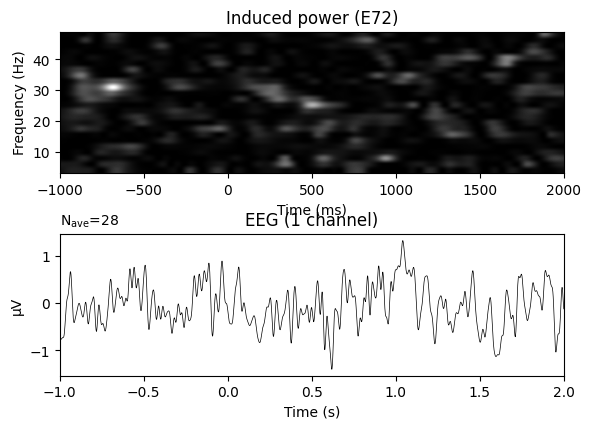

In [13]:
times = 1e3 * epochs_condition_1.times  # change unit to ms

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(6, 4))
fig.subplots_adjust(0.12, 0.08, 0.96, 0.94, 0.2, 0.43)

# Compute the difference in evoked to determine which was greater since
# we used a 1-way ANOVA which tested for a difference in population means
evoked_power_1 = epochs_power_1.mean(axis=0)
evoked_power_2 = epochs_power_2.mean(axis=0)
evoked_power_contrast = evoked_power_1 - evoked_power_2
#signs = np.sign(evoked_power_contrast)
signs = np.sign(evoked_power_contrast)

# Create new stats image with only significant clusters
F_obs_plot = np.nan * np.ones_like(F_obs)
for c, p_val in zip(clusters, cluster_p_values):
    if p_val <= 0.05:
        F_obs_plot[c] = F_obs[c] * signs[c]

ax.imshow(
    F_obs,
    extent=[times[0], times[-1], freqs[0], freqs[-1]],
    aspect="auto",
    origin="lower",
    cmap="gray",
)
max_F = np.nanmax(abs(F_obs_plot))
ax.imshow(
    F_obs_plot,
    extent=[times[0], times[-1], freqs[0], freqs[-1]],
    aspect="auto",
    origin="lower",
    cmap="RdBu_r",
    vmin=-max_F,
    vmax=max_F,
)

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(f"Induced power ({ch_name})")

# plot evoked
evoked_condition_1 = epochs_condition_1.average()
evoked_condition_2 = epochs_condition_2.average()
evoked_contrast = mne.combine_evoked(
    [evoked_condition_1, evoked_condition_2], weights=[1, -1]
)
evoked_contrast.plot(axes=ax2, time_unit="s")
#evoked_condition_2.plot(axes=ax2, time_unit="s")

In [14]:
decim = 2
freqs = np.arange(2, 50, 2)  # define frequencies of interest
n_cycles = freqs / 2

pow_2, itc_2 = tfr_morlet(
    epochs_condition_2,
    freqs,
    n_cycles=n_cycles,
    decim=decim,
    return_itc=True,
    average=True,
)

#pow_2, itc_2 = tfr_morlet(
#    epochs_condition_2,
#    freqs,
#    n_cycles=n_cycles,
#   decim=decim,
#    return_itc=True,
#    average=True,
#)

#tfr_epochs_1.apply_baseline(mode="ratio", baseline=(None, 0))
#tfr_epochs_2.apply_baseline(mode="ratio", baseline=(None, 0))

itc_dat_2 = itc_2.data[0, :, :]  # only 1 channel as 3D matrix
pow_dat_2 = pow_2.data[0, :, :]  # only 1 channel as 3D matrix

/tmp/ipykernel_21015/2038401238.py:5: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  pow_2, itc_2 = tfr_morlet(
/tmp/ipykernel_21015/2038401238.py:5: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  pow_2, itc_2 = tfr_morlet(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


In [15]:
times = 1e3 * epochs_condition_2.times  # change unit to ms

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(6, 4))
fig.subplots_adjust(0.12, 0.08, 0.96, 0.94, 0.2, 0.43)

ax.imshow(
    pow_dat_2,
    extent=[times[0], times[-1], freqs[0], freqs[-1]],
    aspect="auto",
    origin="lower",
    cmap="RdBu_r",
)

ax2.imshow(
    itc_dat_2,
    extent=[times[0], times[-1], freqs[0], freqs[-1]],
    aspect="auto",
    origin="lower",
    cmap="RdBu_r",
)

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(f"Induced power ({ch_name})")

Text(0.5, 1.0, 'Induced power (E72)')

In [27]:
# Epoch structure is created for ALL events, then you 'segment' by indexing into it
epochs = mne.Epochs(ll_qcr, eeg_events, event_id=eeg_event_dict, tmin=-1, tmax=2.0, on_missing='warn', event_repeated='drop')

Not setting metadata
1331 matching events found
Setting baseline interval to [-1.0, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated


/tmp/ipykernel_23624/3552720110.py:2: RuntimeWarning: No matching events found for VBeg (event id 13)
  epochs = mne.Epochs(ll_qcr, eeg_events, event_id=eeg_event_dict, tmin=-1, tmax=2.0, on_missing='warn', event_repeated='drop')


In [10]:
# Check trial counts
epochs[['fq06hz', 'fq15hz']]

/home/james/q1k/pilot/q1k-external-pilot/eeg-env/lib/python3.8/site-packages/IPython/core/formatters.py:344: RuntimeWarning: The MNE-Python config file (/home/james/.mne/mne-python.json) is not a valid JSON file and might be corrupted
  return method()


Number of events,120
Events,fq06hz/target/disp/dstr: 60fq15hz/target/disp/fvct: 60
Time range,-1.000 – 2.000 s
Baseline,-1.000 – 0.000 s


In [11]:
# Plot ERPs
evokeds = {'fq06hz': epochs['fq06hz'].average(), 'fq15hz': epochs['fq15hz'].average()}
mne.viz.plot_compare_evokeds(evokeds, picks=['E72'], combine='mean')

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
combining channels using "mean"
combining channels using "mean"


/tmp/ipykernel_6495/3322987310.py:3: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=['E72'], combine='mean')


[<Figure size 800x600 with 2 Axes>]

In [12]:
mne.write_evokeds(f'erp_fif_files/vp/009_1_vp_ave.fif',list(evokeds.values()), overwrite=True)